# 网络流量预测
## 初赛
### 测评方案
给出2017-1-1至2018-11-15的数据，要求参赛者预测往后95天的流量（预测从2018-11-16 00:00:00到2019-02-18 23:00:00），测评的特定节假日包括：元旦、春节。

数据集中明确给出的节假日包括：
元旦、春节、五一、中秋、国庆，参赛者也可以使用其他的节日，或者任何其他从网上能搜到的数据。

误差测评公式：MAPE

分别对未来预测出来结果的小时粒度、每日峰值、节假日期间小时粒度加权，权重为0.7, 0.2, 0.1

### 计算公式
$Score = 0.7 * MAPE_{hour} + 0.2 * MAPE_{peakpoint} + 0.1 * MAPE_{holiday}$

In [1]:
%%html
<img src='../images/mape.jpg', width=400>

### 数据准备
展示原始数据集，其中数据条目共49248条

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
holiday = pd.read_csv("../data/holiday_dates.csv", encoding='gbk')
holiday

,Unnamed: 0,节日,开始时间_2017,结束时间_2017,开始时间_2018,结束时间_2018,开始时间_2019,结束时间_2019
0,0,元旦,2017-1-1 0:00,2017-1-2 23:00,2017-12-30 0:00,2018-1-1 23:00,2018-12-30 0:00,2019-1-1 23:00
1,1,春节,2017-1-27 0:00,2017-2-2 23:00,2018-2-15 0:00,2018-2-21 23:00,2019-2-4 0:00,2019-2-10 23:00
2,2,五一,2017-4-29 0:00,2017-5-1 23:00,2018-4-29 0:00,2018-5-1 23:00,2019-5-1 0:00,2019-5-4 23:00
3,3,中秋,2017-9-4 0:00,2017-9-4 23:00,2018-9-22 0:00,2018-9-24 23:00,2019-9-13 0:00,2019-9-15 23:00
4,4,国庆,2017-10-1 0:00,2017-10-7 23:00,2018-10-1 0:00,2018-10-7 23:00,2019-10-1 0:00,2019-10-7 23:00


In [4]:
data = pd.read_csv("../data/data_1.csv", encoding='gbk')
data

,Unnamed: 0,时间,地市,流量
0,0,2017-01-01 00:00:00,A,3.900242
1,1,2017-01-01 01:00:00,A,2.520269
2,2,2017-01-01 02:00:00,A,1.489956
3,3,2017-01-01 03:00:00,A,0.896120
4,4,2017-01-01 04:00:00,A,0.608650
5,5,2017-01-01 05:00:00,A,0.552281
6,6,2017-01-01 06:00:00,A,0.799602
7,7,2017-01-01 07:00:00,A,1.492962
8,8,2017-01-01 08:00:00,A,2.319831
9,9,2017-01-01 09:00:00,A,3.057129


### 空值
存在空值的条目共105条，多为三地市同一时刻缺失

In [5]:
data[data.isnull().values==True]

,Unnamed: 0,时间,地市,流量
73,73,2017-01-04 01:00:00,A,NaN
160,160,2017-01-07 16:00:00,A,NaN
194,194,2017-01-09 02:00:00,A,NaN
195,195,2017-01-09 03:00:00,A,NaN
196,196,2017-01-09 04:00:00,A,NaN
197,197,2017-01-09 05:00:00,A,NaN
218,218,2017-01-10 02:00:00,A,NaN
219,219,2017-01-10 03:00:00,A,NaN
220,220,2017-01-10 04:00:00,A,NaN
221,221,2017-01-10 05:00:00,A,NaN


### 流量总体分布
* A地市流量增长幅度较大，但存在2到3个波谷需注意
* B和C地市在A市的两个低谷处存在波峰现象

In [6]:
A_df = pd.DataFrame({'Time': data[data["地市"].values =='A']["时间"], 
                             'A': data[data["地市"].values =='A']["流量"]})
B_df = pd.DataFrame({'Time': data[data["地市"].values =='B']["时间"], 
                             'B': data[data["地市"].values =='B']["流量"]})
C_df = pd.DataFrame({'Time': data[data["地市"].values =='C']["时间"], 
                             'C': data[data["地市"].values =='C']["流量"]})

index_data = pd.merge(pd.merge(A_df, B_df, how='inner', on='Time'), C_df, how='inner', on='Time')
traffic_data = index_data.set_index("Time")
traffic_data

,A,B,C
Time,,,
2017-01-01 00:00:00,3.900242,0.781319,0.586921
2017-01-01 01:00:00,2.520269,0.500109,0.355447
2017-01-01 02:00:00,1.489956,0.314532,0.224744
2017-01-01 03:00:00,0.896120,0.194909,0.147097
2017-01-01 04:00:00,0.608650,0.153006,0.119381
2017-01-01 05:00:00,0.552281,0.173710,0.139305
2017-01-01 06:00:00,0.799602,0.286546,0.239321
2017-01-01 07:00:00,1.492962,0.535708,0.457654
2017-01-01 08:00:00,2.319831,0.736106,0.613619


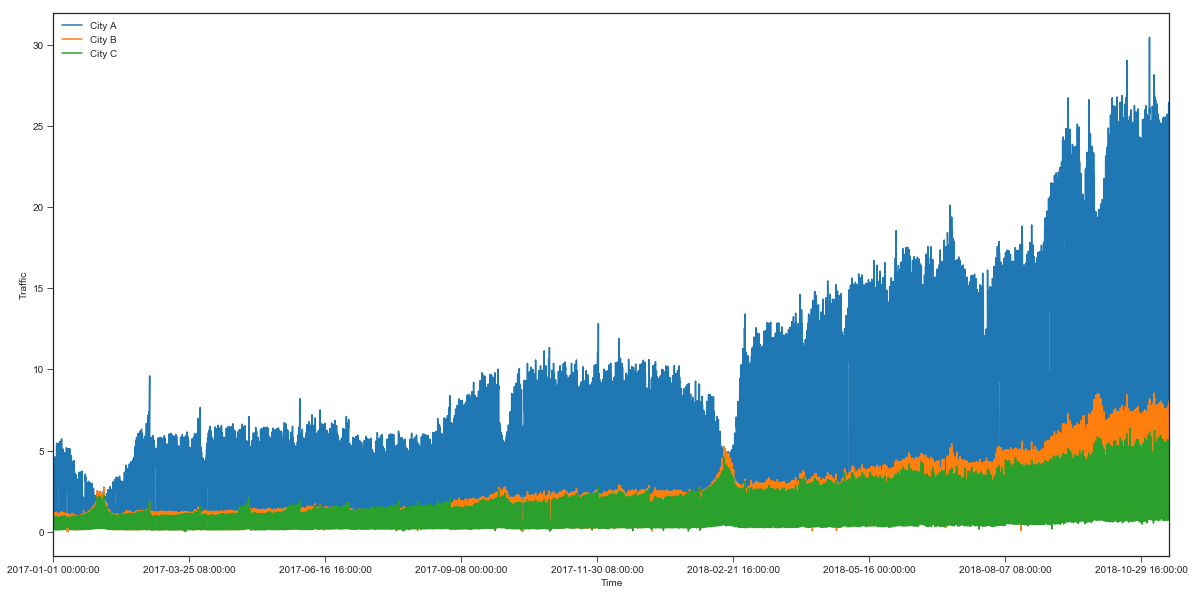

In [7]:
%matplotlib inline
plt.style.use('seaborn-ticks')

plt.figure(figsize=(20, 10))
traffic_data["A"].plot(label="City A")
traffic_data["B"].plot(label="City B")
traffic_data["C"].plot(label="City C")

plt.ylabel('Traffic')
plt.legend()

### 节假日—元旦

In [8]:
newyear2017_start = traffic_data[traffic_data.index >= '2017-01-01 00:00:00']
newyear2017 = newyear2017_start[newyear2017_start.index <= '2017-01-02 23:00:00']
newyear2018_start = traffic_data[traffic_data.index >= '2017-12-30 00:00:00']
newyear2018 = newyear2018_start[newyear2018_start.index <= '2018-01-01 23:00:00']

newyear2018

,A,B,C
Time,,,
2017-12-30 00:00:00,6.848984,1.327262,1.044115
2017-12-30 01:00:00,4.151374,0.789823,0.624079
2017-12-30 02:00:00,2.348729,0.501588,0.405108
2017-12-30 03:00:00,1.430571,0.337810,0.290514
2017-12-30 04:00:00,1.069622,0.281752,0.258906
2017-12-30 05:00:00,1.122470,0.338126,0.315162
2017-12-30 06:00:00,1.824689,0.565973,0.561090
2017-12-30 07:00:00,3.404377,0.987370,0.995779
2017-12-30 08:00:00,5.200270,1.404672,1.385742


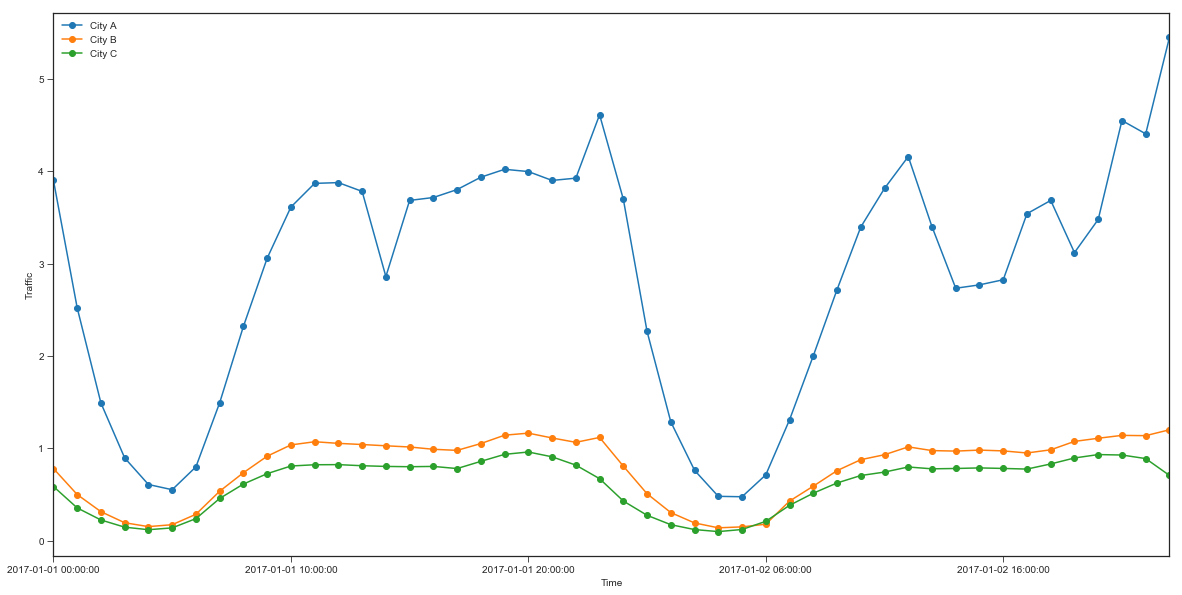

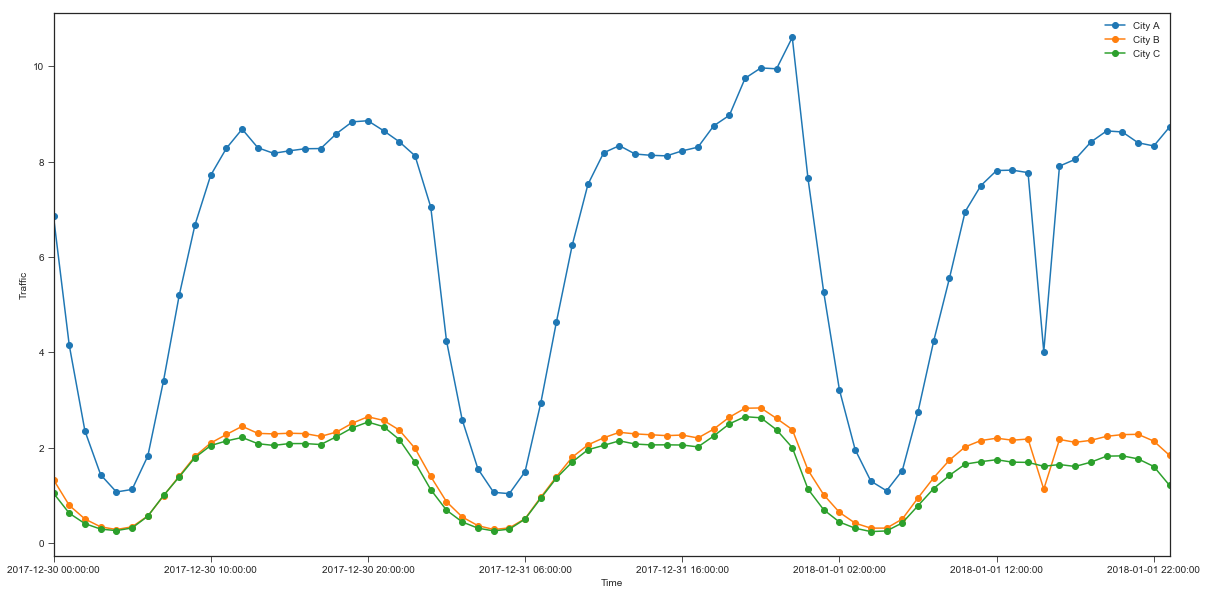

In [9]:
plt.figure(figsize=(20, 10))

newyear2017["A"].plot(marker='o', label="City A")
newyear2017["B"].plot(marker='o', label="City B")
newyear2017["C"].plot(marker='o', label="City C")

plt.ylabel('Traffic')
plt.legend()

plt.figure(figsize=(20, 10))

newyear2018["A"].plot(marker='o', label="City A")
newyear2018["B"].plot(marker='o', label="City B")
newyear2018["C"].plot(marker='o', label="City C")

plt.ylabel('Traffic')
plt.legend()

### 节假日—春节

In [10]:
springfestival2017_start = traffic_data[traffic_data.index >= '2017-01-27 00:00:00']
springfestival2017 = springfestival2017_start[springfestival2017_start.index <= '2017-02-02 23:00:00']
springfestival2018_start = traffic_data[traffic_data.index >= '2018-02-15 00:00:00']
springfestival2018 = springfestival2018_start[springfestival2018_start.index <= '2018-02-21 23:00:00']

springfestival2018

,A,B,C
Time,,,
2018-02-15 00:00:00,2.575999,1.908210,1.711473
2018-02-15 01:00:00,1.668746,1.170157,1.043211
2018-02-15 02:00:00,1.070551,0.768447,0.660766
2018-02-15 03:00:00,0.768061,0.583132,0.473248
2018-02-15 04:00:00,0.653375,0.543966,0.421179
2018-02-15 05:00:00,0.697999,0.638553,0.472700
2018-02-15 06:00:00,1.104659,1.148079,0.877187
2018-02-15 07:00:00,2.071479,2.178883,1.848658
2018-02-15 08:00:00,2.855615,2.632015,2.284789


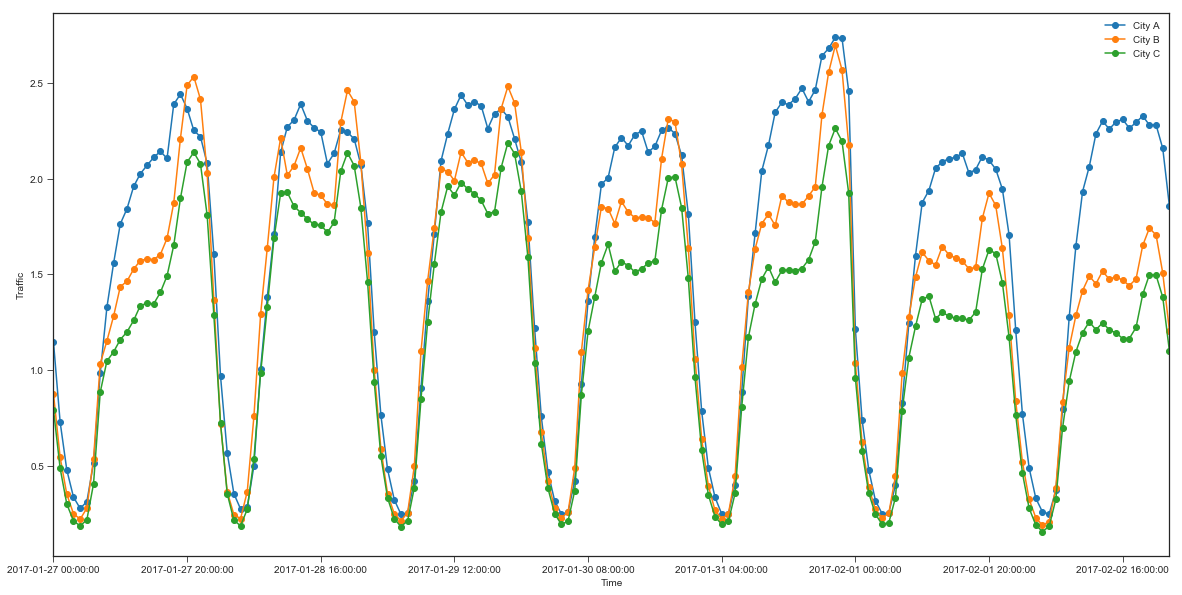

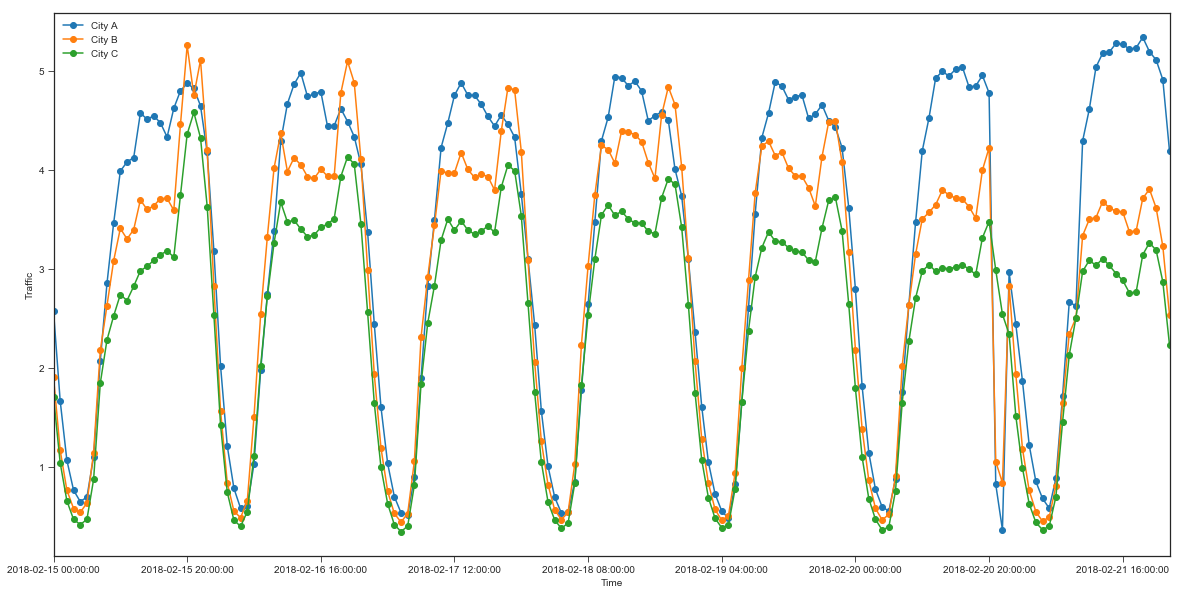

In [11]:
plt.figure(figsize=(20, 10))

springfestival2017["A"].plot(marker='o', label="City A")
springfestival2017["B"].plot(marker='o', label="City B")
springfestival2017["C"].plot(marker='o', label="City C")

plt.ylabel('Traffic')
plt.legend()

plt.figure(figsize=(20, 10))

springfestival2018["A"].plot(marker='o', label="City A")
springfestival2018["B"].plot(marker='o', label="City B")
springfestival2018["C"].plot(marker='o', label="City C")

plt.ylabel('Traffic')
plt.legend()

### 节假日—劳动节

In [12]:
mayday2017_start = traffic_data[traffic_data.index >= '2017-04-29 00:00:00']
mayday2017 = mayday2017_start[mayday2017_start.index <= '2017-05-01 23:00:00']
mayday2018_start = traffic_data[traffic_data.index >= '2018-04-29 00:00:00']
mayday2018 = mayday2018_start[mayday2018_start.index <= '2018-05-01 23:00:00']

mayday2018

,A,B,C
Time,,,
2018-04-29 00:00:00,8.941364,1.565874,1.233487
2018-04-29 01:00:00,5.395364,0.919052,0.733709
2018-04-29 02:00:00,3.038308,0.555522,0.457986
2018-04-29 03:00:00,1.909436,0.373393,0.329756
2018-04-29 04:00:00,1.391567,0.322288,0.293806
2018-04-29 05:00:00,1.906982,0.523667,0.536871
2018-04-29 06:00:00,3.593370,1.013551,1.049821
2018-04-29 07:00:00,5.971073,1.590158,1.565862
2018-04-29 08:00:00,8.270754,2.131284,2.011791


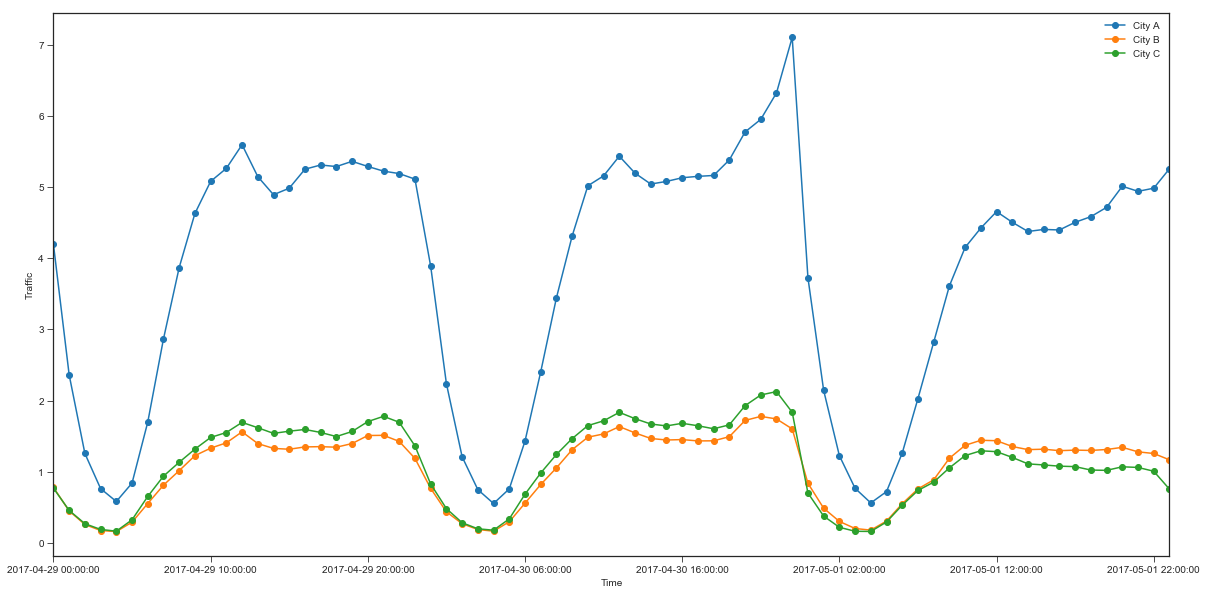

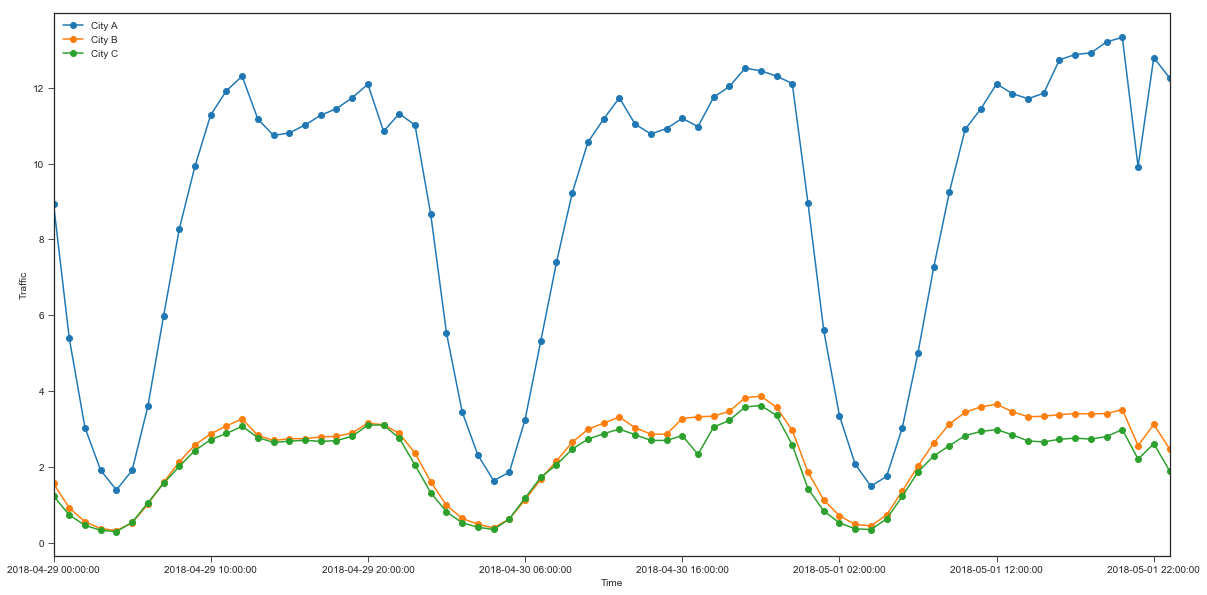

In [13]:
plt.figure(figsize=(20, 10))

mayday2017["A"].plot(marker='o', label="City A")
mayday2017["B"].plot(marker='o', label="City B")
mayday2017["C"].plot(marker='o', label="City C")

plt.ylabel('Traffic')
plt.legend()

plt.figure(figsize=(20, 10))

mayday2018["A"].plot(marker='o', label="City A")
mayday2018["B"].plot(marker='o', label="City B")
mayday2018["C"].plot(marker='o', label="City C")

plt.ylabel('Traffic')
plt.legend()

### 节假日—中秋节

In [14]:
midautumn2017_start = traffic_data[traffic_data.index >= '2017-09-04 00:00:00']
midautumn2017 = midautumn2017_start[midautumn2017_start.index <= '2017-09-04 23:00:00']
midautumn2018_start = traffic_data[traffic_data.index >= '2018-09-22 00:00:00']
midautumn2018 = midautumn2018_start[midautumn2018_start.index <= '2018-09-24 23:00:00']

midautumn2018

,A,B,C
Time,,,
2018-09-22 00:00:00,15.017734,3.189582,2.361242
2018-09-22 01:00:00,8.782825,1.808353,1.367987
2018-09-22 02:00:00,5.002345,1.115492,0.883825
2018-09-22 03:00:00,3.161836,0.790390,0.647776
2018-09-22 04:00:00,2.416230,0.737338,0.631167
2018-09-22 05:00:00,2.783400,1.084750,0.996784
2018-09-22 06:00:00,5.642905,2.196163,2.036591
2018-09-22 07:00:00,10.113526,3.248624,2.612700
2018-09-22 08:00:00,13.394132,4.115536,2.873154


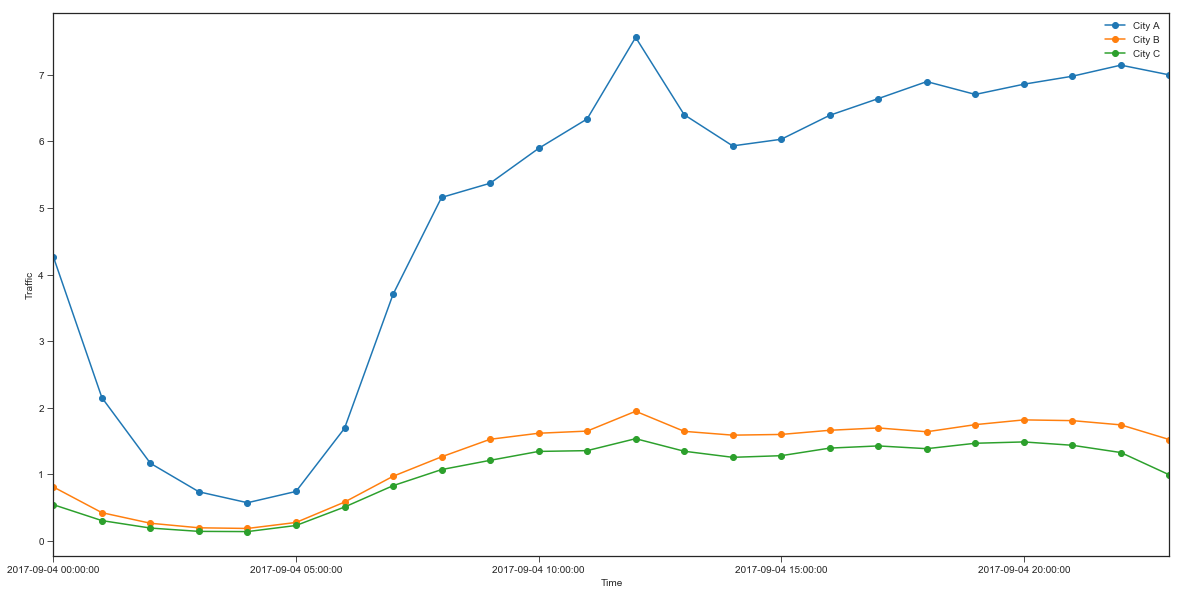

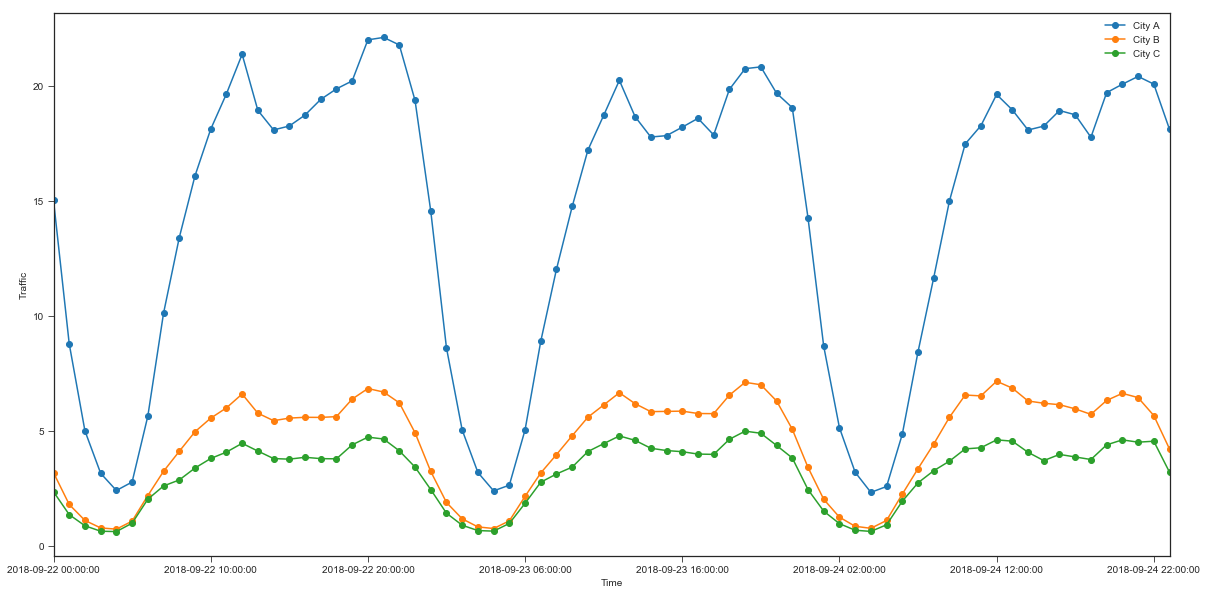

In [15]:
plt.figure(figsize=(20, 10))

midautumn2017["A"].plot(marker='o', label="City A")
midautumn2017["B"].plot(marker='o', label="City B")
midautumn2017["C"].plot(marker='o', label="City C")

plt.ylabel('Traffic')
plt.legend()

plt.figure(figsize=(20, 10))

midautumn2018["A"].plot(marker='o', label="City A")
midautumn2018["B"].plot(marker='o', label="City B")
midautumn2018["C"].plot(marker='o', label="City C")

plt.ylabel('Traffic')
plt.legend()

### 节假日—国庆节

In [16]:
nationalday2017_start = traffic_data[traffic_data.index >= '2017-10-01 00:00:00']
nationalday2017 = nationalday2017_start[nationalday2017_start.index <= '2017-10-07 23:00:00']
nationalday2018_start = traffic_data[traffic_data.index >= '2018-10-01 00:00:00']
nationalday2018 = nationalday2018_start[nationalday2018_start.index <= '2018-10-07 23:00:00']

nationalday2018

,A,B,C
Time,,,
2018-10-01 00:00:00,13.760017,3.648474,2.580153
2018-10-01 01:00:00,8.441029,2.209673,1.554562
2018-10-01 02:00:00,5.167309,1.453006,1.062925
2018-10-01 03:00:00,3.442163,1.094401,0.777551
2018-10-01 04:00:00,2.774498,1.042309,0.741970
2018-10-01 05:00:00,3.425108,1.513321,1.165038
2018-10-01 06:00:00,6.485485,3.095779,2.294259
2018-10-01 07:00:00,10.389404,4.390069,2.889651
2018-10-01 08:00:00,13.514335,5.351841,3.441817


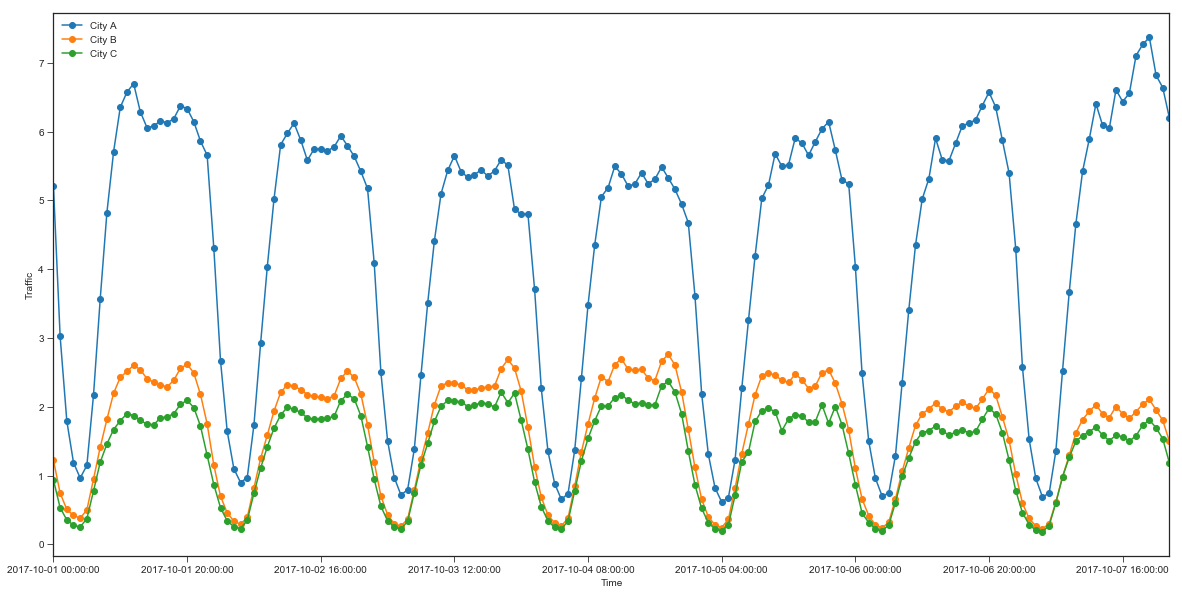

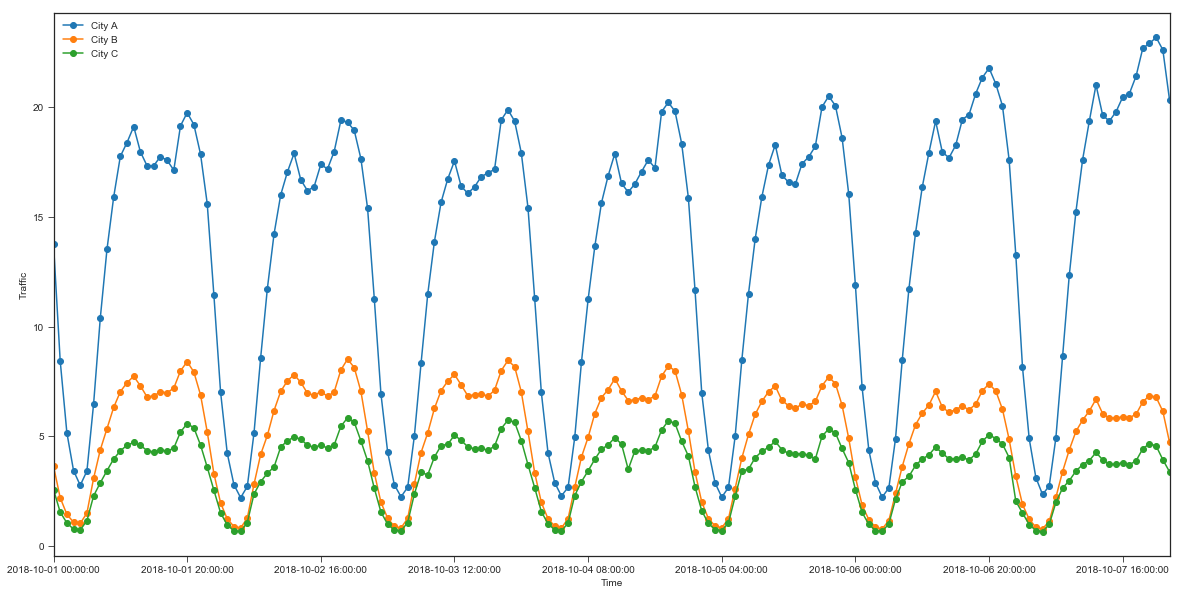

In [17]:
plt.figure(figsize=(20, 10))

nationalday2017["A"].plot(marker='o', label="City A")
nationalday2017["B"].plot(marker='o', label="City B")
nationalday2017["C"].plot(marker='o', label="City C")

plt.ylabel('Traffic')
plt.legend()

plt.figure(figsize=(20, 10))

nationalday2018["A"].plot(marker='o', label="City A")
nationalday2018["B"].plot(marker='o', label="City B")
nationalday2018["C"].plot(marker='o', label="City C")

plt.ylabel('Traffic')
plt.legend()

### 节假日和其他时间区别—元旦
* 因为预测结果包括元旦和春节的时间，特别考虑元旦和春节与平常时候的流量区别
* 特别考虑扩展节假日前后各3天以考察区别（2017年元旦向后扩展一星期）

In [18]:
newyear2017_expand_start = traffic_data[traffic_data.index >= '2017-01-01 00:00:00']
newyear2017_expand = newyear2017_expand_start[newyear2017_expand_start.index <= '2017-01-07 23:00:00']
newyear2018_expand_start = traffic_data[traffic_data.index >= '2017-12-27 00:00:00']
newyear2018_expand = newyear2018_expand_start[newyear2018_expand_start.index <= '2018-01-04 23:00:00']

newyear2018_expand

,A,B,C
Time,,,
2017-12-27 00:00:00,6.850750,1.340946,0.700751
2017-12-27 01:00:00,3.411541,0.711335,0.504642
2017-12-27 02:00:00,1.931212,0.416129,0.367156
2017-12-27 03:00:00,1.202312,0.287194,0.267040
2017-12-27 04:00:00,0.874498,0.242760,0.224181
2017-12-27 05:00:00,0.938037,0.299981,0.294010
2017-12-27 06:00:00,1.762706,0.550880,0.537171
2017-12-27 07:00:00,4.289678,1.046196,0.981488
2017-12-27 08:00:00,6.561001,1.442785,1.345186


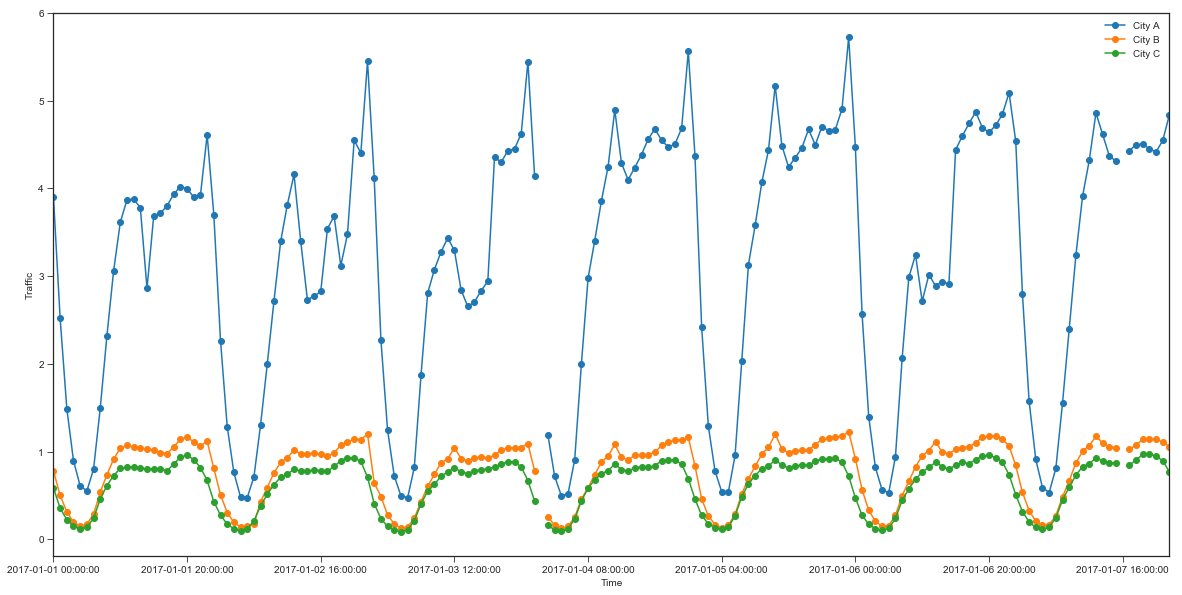

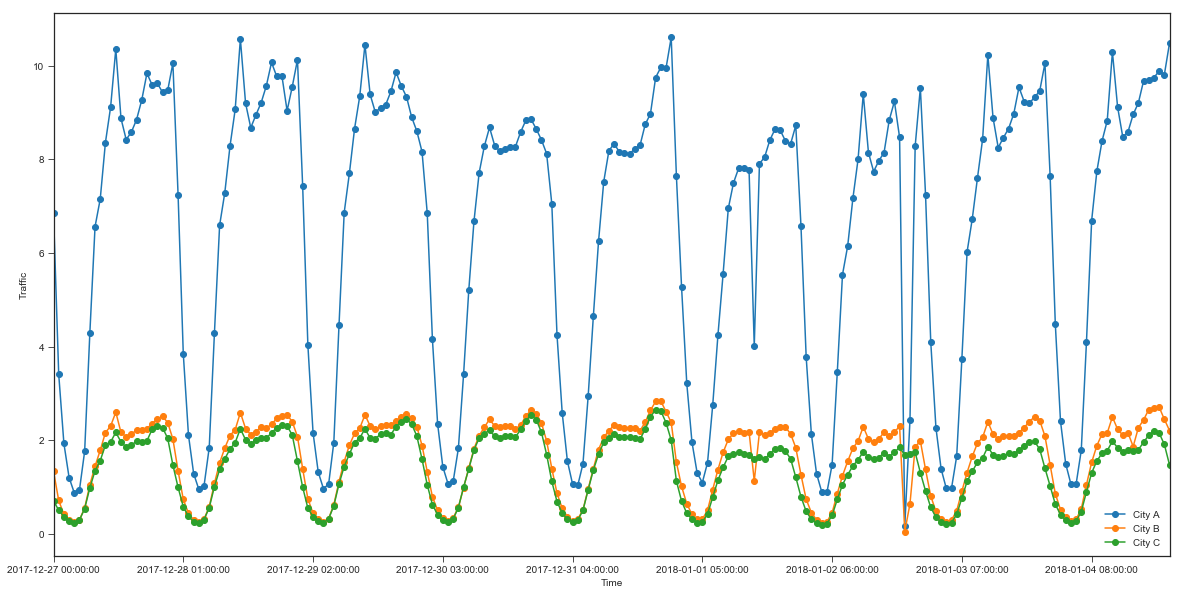

In [19]:
plt.figure(figsize=(20, 10))

newyear2017_expand["A"].plot(marker='o', label="City A")
newyear2017_expand["B"].plot(marker='o', label="City B")
newyear2017_expand["C"].plot(marker='o', label="City C")

plt.ylabel('Traffic')
plt.legend()

plt.figure(figsize=(20, 10))

newyear2018_expand["A"].plot(marker='o', label="City A")
newyear2018_expand["B"].plot(marker='o', label="City B")
newyear2018_expand["C"].plot(marker='o', label="City C")

plt.ylabel('Traffic')
plt.legend()

### 节假日和其他时间区别—春节
* 春节期间A市流量与平常相比流量相对减少
* B市与C市与A市相反，春节期间流量激增
* 这似乎与总体分布中A市的波谷与BC市的波峰吻合

In [20]:
springfestvial2017_expand_start = traffic_data[traffic_data.index >= '2017-01-24 00:00:00']
springfestvial2017_expand = springfestvial2017_expand_start[springfestvial2017_expand_start.index <= '2017-02-05 23:00:00']
springfestvial2018_expand_start = traffic_data[traffic_data.index >= '2018-02-12 00:00:00']
springfestvial2018_expand = springfestvial2018_expand_start[springfestvial2018_expand_start.index <= '2018-02-23 23:00:00']

springfestvial2018_expand


,A,B,C
Time,,,
2018-02-12 00:00:00,3.246951,1.481697,1.319172
2018-02-12 01:00:00,2.040702,0.924075,0.814506
2018-02-12 02:00:00,1.342517,0.630041,0.529643
2018-02-12 03:00:00,0.938633,0.457836,0.388637
2018-02-12 04:00:00,0.769693,0.390866,0.350558
2018-02-12 05:00:00,0.833378,0.407209,0.392317
2018-02-12 06:00:00,NaN,NaN,NaN
2018-02-12 07:00:00,0.795047,0.436639,1.252395
2018-02-12 08:00:00,3.648213,1.590755,1.801192


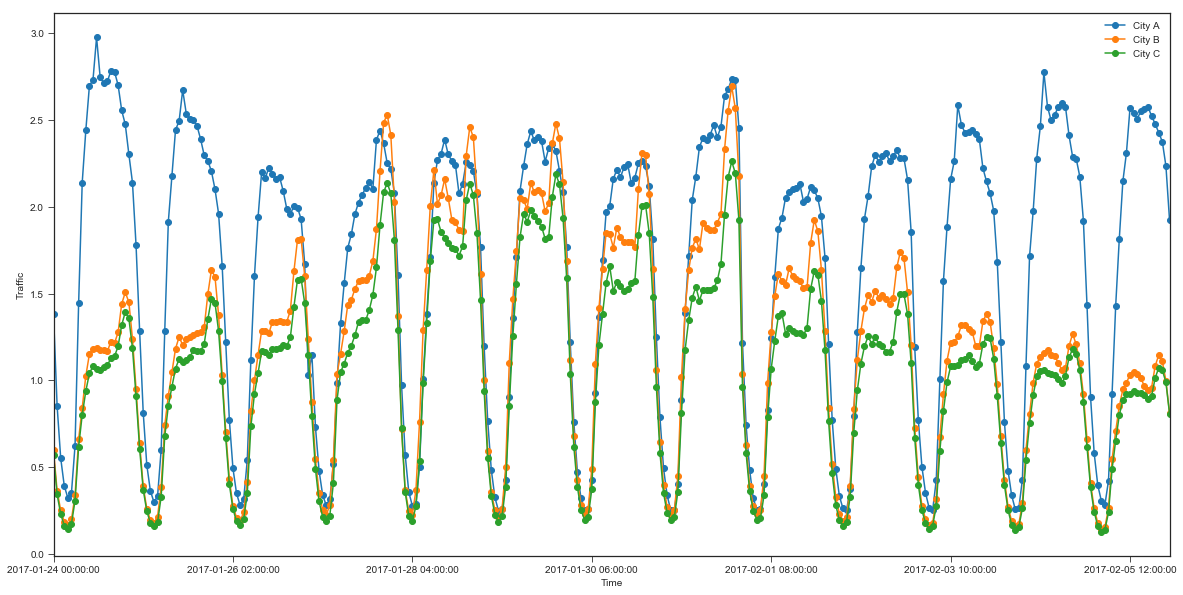

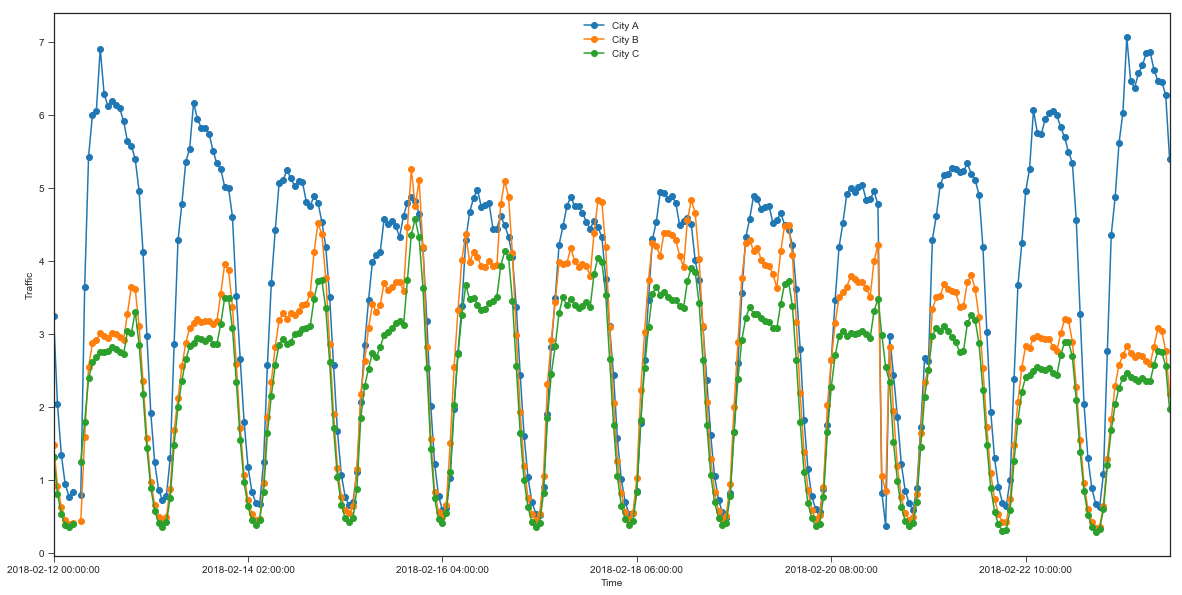

In [21]:
plt.figure(figsize=(20, 10))

springfestvial2017_expand["A"].plot(marker='o', label="City A")
springfestvial2017_expand["B"].plot(marker='o', label="City B")
springfestvial2017_expand["C"].plot(marker='o', label="City C")

plt.ylabel('Traffic')
plt.legend()

plt.figure(figsize=(20, 10))

springfestvial2018_expand["A"].plot(marker='o', label="City A")
springfestvial2018_expand["B"].plot(marker='o', label="City B")
springfestvial2018_expand["C"].plot(marker='o', label="City C")

plt.ylabel('Traffic')
plt.legend()

### 数据统计

In [22]:
traffic_data.mean()

A    7.338850
B    1.953614
C    1.621291
dtype: float64

In [23]:
traffic_data.std()

A    5.618485
B    1.586373
C    1.171734
dtype: float64

In [24]:
traffic_data.max()

A    30.482362
B     8.543887
C     6.375538
dtype: float64

In [25]:
traffic_data.min()

A    0.029778
B    0.000213
C    0.016986
dtype: float64

In [26]:
traffic_data.median()

A    5.635195
B    1.385984
C    1.339872
dtype: float64

In [27]:
traffic_data.sum()

A    120254.392330
B     32015.832188
C     26538.920282
dtype: float64

### 特征工程
由于特征过少，考虑构造新特征是关键，暂时构造以下特征来弥补当前小时知道的过少信息，以帮助推测趋势：
* A_day_mean A市当天的流量平均值
* A_day_std A市当天的流量标准差
* A_day_max A市当天的流量峰值
* A_day_min A市当天的流量最低值
* A_day_median A市当天的流量中位数
* A_day_sum A市当天的流量总和
* ...
* A_month_mean A市当月的流量平均值
* A_month_std A市当月的流量标准差
* A_month_max A市当月的流量峰值
* A_month_min A市当月的流量最低值
* A_month_median A市当月的流量中位数
* A_month_sum A市当月的流量总和
* ...

In [28]:
A_day_traffic = []
A_month_traffic = []

A_day_mean = []
A_day_std = []
A_day_max = []
A_day_min = []
A_day_median = []
A_day_sum = []

A_month_mean = []
A_month_std = []
A_month_max = []
A_month_min = []
A_month_median = []
A_month_sum = []

B_day_traffic = []
B_month_traffic = []

B_day_mean = []
B_day_std = []
B_day_max = []
B_day_min = []
B_day_median = []
B_day_sum = []

B_month_mean = []
B_month_std = []
B_month_max = []
B_month_min = []
B_month_median = []
B_month_sum = []

C_day_traffic = []
C_month_traffic = []

C_day_mean = []
C_day_std = []
C_day_max = []
C_day_min = []
C_day_median = []
C_day_sum = []

C_month_mean = []
C_month_std = []
C_month_max = []
C_month_min = []
C_month_median = []
C_month_sum = []

array_data = traffic_data.values

for i in range(0, len(traffic_data)):
    A_traffic = array_data[i][0]
    B_traffic = array_data[i][1]
    C_traffic = array_data[i][2]
    if np.isnan(A_traffic) != 1:
        A_day_traffic.append(A_traffic)
        A_month_traffic.append(A_traffic)
    if np.isnan(B_traffic) != 1:
        B_day_traffic.append(B_traffic)
        B_month_traffic.append(B_traffic)
    if np.isnan(C_traffic) != 1:
        C_day_traffic.append(C_traffic)
        C_month_traffic.append(C_traffic)
    if (i + 1) % 24 == 0:
        for j in range(0, 24):         
            A_day_mean.append(np.mean(A_day_traffic))
            A_day_std.append(np.std(A_day_traffic))
            A_day_max.append(np.max(A_day_traffic))
            A_day_min.append(np.min(A_day_traffic))
            A_day_median.append(np.median(A_day_traffic))
            A_day_sum.append(np.sum(A_day_traffic))
            
            B_day_mean.append(np.mean(B_day_traffic))
            B_day_std.append(np.std(B_day_traffic))
            B_day_max.append(np.max(B_day_traffic))
            B_day_min.append(np.min(B_day_traffic))
            B_day_median.append(np.median(B_day_traffic))
            B_day_sum.append(np.sum(B_day_traffic))
            
            C_day_mean.append(np.mean(C_day_traffic))
            C_day_std.append(np.std(C_day_traffic))
            C_day_max.append(np.max(C_day_traffic))
            C_day_min.append(np.min(C_day_traffic))
            C_day_median.append(np.median(C_day_traffic))
            C_day_sum.append(np.sum(C_day_traffic))
        A_day_traffic = []
        B_day_traffic = []
        C_day_traffic = []
    if (i + 1) % (24 * 30) == 0:
        for j in range(0, 24 * 30):
            A_month_mean.append(np.mean(A_month_traffic))
            A_month_std.append(np.std(A_month_traffic))
            A_month_max.append(np.max(A_month_traffic))
            A_month_min.append(np.min(A_month_traffic))
            A_month_median.append(np.median(A_month_traffic))
            A_month_sum.append(np.sum(A_month_traffic))
            
            B_month_mean.append(np.mean(B_month_traffic))
            B_month_std.append(np.std(B_month_traffic))
            B_month_max.append(np.max(B_month_traffic))
            B_month_min.append(np.min(B_month_traffic))
            B_month_median.append(np.median(B_month_traffic))
            B_month_sum.append(np.sum(B_month_traffic))
            
            C_month_mean.append(np.mean(C_month_traffic))
            C_month_std.append(np.std(C_month_traffic))
            C_month_max.append(np.max(C_month_traffic))
            C_month_min.append(np.min(C_month_traffic))
            C_month_median.append(np.median(C_month_traffic))
            C_month_sum.append(np.sum(C_month_traffic))
        A_month_traffic = []
        B_month_traffic = []
        C_month_traffic = []
    if (i + 1) == len(traffic_data):
        for j in range(0, len(traffic_data) % (24 * 30)):
            A_month_mean.append(np.mean(A_month_traffic))
            A_month_std.append(np.std(A_month_traffic))
            A_month_max.append(np.max(A_month_traffic))
            A_month_min.append(np.min(A_month_traffic))
            A_month_median.append(np.median(A_month_traffic))
            A_month_sum.append(np.sum(A_month_traffic))
            
            B_month_mean.append(np.mean(B_month_traffic))
            B_month_std.append(np.std(B_month_traffic))
            B_month_max.append(np.max(B_month_traffic))
            B_month_min.append(np.min(B_month_traffic))
            B_month_median.append(np.median(B_month_traffic))
            B_month_sum.append(np.sum(B_month_traffic))
            
            C_month_mean.append(np.mean(C_month_traffic))
            C_month_std.append(np.std(C_month_traffic))
            C_month_max.append(np.max(C_month_traffic))
            C_month_min.append(np.min(C_month_traffic))
            C_month_median.append(np.median(C_month_traffic))
            C_month_sum.append(np.sum(C_month_traffic))
        A_month_traffic = []
        B_month_traffic = []
        C_month_traffic = []
        
    i += 1

A_data = pd.DataFrame({"A_traffic": traffic_data["A"]})
A_data["A_day_mean"] = A_day_mean
A_data["A_day_std"] = A_day_std
A_data["A_day_max"] = A_day_max
A_data["A_day_min"] = A_day_min
A_data["A_day_median"] = A_day_median
A_data["A_day_sum"] = A_day_sum
A_data["A_month_mean"] = A_month_mean
A_data["A_month_std"] = A_month_std
A_data["A_month_max"] = A_month_max
A_data["A_month_min"] = A_month_min
A_data["A_month_median"] = A_month_median
A_data["A_month_sum"] = A_month_sum

B_data = pd.DataFrame({"B_traffic": traffic_data["B"]})
B_data["B_day_mean"] = B_day_mean
B_data["B_day_std"] = B_day_std
B_data["B_day_max"] = B_day_max
B_data["B_day_min"] = B_day_min
B_data["B_day_median"] = B_day_median
B_data["B_day_sum"] = B_day_sum
B_data["B_month_mean"] = B_month_mean
B_data["B_month_std"] = B_month_std
B_data["B_month_max"] = B_month_max
B_data["B_month_min"] = B_month_min
B_data["B_month_median"] = B_month_median
B_data["B_month_sum"] = B_month_sum

C_data = pd.DataFrame({"C_traffic": traffic_data["C"]})
C_data["C_day_mean"] = C_day_mean
C_data["C_day_std"] = C_day_std
C_data["C_day_max"] = C_day_max
C_data["C_day_min"] = C_day_min
C_data["C_day_median"] = C_day_median
C_data["C_day_sum"] = C_day_sum
C_data["C_month_mean"] = C_month_mean
C_data["C_month_std"] = C_month_std
C_data["C_month_max"] = C_month_max
C_data["C_month_min"] = C_month_min
C_data["C_month_median"] = C_month_median
C_data["C_month_sum"] = C_month_sum

In [29]:
A_data

,A_traffic,A_day_mean,A_day_std,A_day_max,A_day_min,A_day_median,A_day_sum,A_month_mean,A_month_std,A_month_max,A_month_min,A_month_median,A_month_sum
Time,,,,,,,,,,,,,
2017-01-01 00:00:00,3.900242,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951
2017-01-01 01:00:00,2.520269,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951
2017-01-01 02:00:00,1.489956,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951
2017-01-01 03:00:00,0.896120,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951
2017-01-01 04:00:00,0.608650,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951
2017-01-01 05:00:00,0.552281,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951
2017-01-01 06:00:00,0.799602,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951
2017-01-01 07:00:00,1.492962,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951
2017-01-01 08:00:00,2.319831,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951


In [30]:
B_data

,B_traffic,B_day_mean,B_day_std,B_day_max,B_day_min,B_day_median,B_day_sum,B_month_mean,B_month_std,B_month_max,B_month_min,B_month_median,B_month_sum
Time,,,,,,,,,,,,,
2017-01-01 00:00:00,0.781319,0.810777,0.344685,1.164345,0.153006,1.002222,19.458647,0.868510,0.493417,2.531696,0.000213,0.921137,616.641853
2017-01-01 01:00:00,0.500109,0.810777,0.344685,1.164345,0.153006,1.002222,19.458647,0.868510,0.493417,2.531696,0.000213,0.921137,616.641853
2017-01-01 02:00:00,0.314532,0.810777,0.344685,1.164345,0.153006,1.002222,19.458647,0.868510,0.493417,2.531696,0.000213,0.921137,616.641853
2017-01-01 03:00:00,0.194909,0.810777,0.344685,1.164345,0.153006,1.002222,19.458647,0.868510,0.493417,2.531696,0.000213,0.921137,616.641853
2017-01-01 04:00:00,0.153006,0.810777,0.344685,1.164345,0.153006,1.002222,19.458647,0.868510,0.493417,2.531696,0.000213,0.921137,616.641853
2017-01-01 05:00:00,0.173710,0.810777,0.344685,1.164345,0.153006,1.002222,19.458647,0.868510,0.493417,2.531696,0.000213,0.921137,616.641853
2017-01-01 06:00:00,0.286546,0.810777,0.344685,1.164345,0.153006,1.002222,19.458647,0.868510,0.493417,2.531696,0.000213,0.921137,616.641853
2017-01-01 07:00:00,0.535708,0.810777,0.344685,1.164345,0.153006,1.002222,19.458647,0.868510,0.493417,2.531696,0.000213,0.921137,616.641853
2017-01-01 08:00:00,0.736106,0.810777,0.344685,1.164345,0.153006,1.002222,19.458647,0.868510,0.493417,2.531696,0.000213,0.921137,616.641853


In [31]:
C_data

,C_traffic,C_day_mean,C_day_std,C_day_max,C_day_min,C_day_median,C_day_sum,C_month_mean,C_month_std,C_month_max,C_month_min,C_month_median,C_month_sum
Time,,,,,,,,,,,,,
2017-01-01 00:00:00,0.586921,0.634182,0.273066,0.960446,0.119381,0.791186,15.220363,0.761955,0.439848,2.186896,0.088843,0.804357,539.464319
2017-01-01 01:00:00,0.355447,0.634182,0.273066,0.960446,0.119381,0.791186,15.220363,0.761955,0.439848,2.186896,0.088843,0.804357,539.464319
2017-01-01 02:00:00,0.224744,0.634182,0.273066,0.960446,0.119381,0.791186,15.220363,0.761955,0.439848,2.186896,0.088843,0.804357,539.464319
2017-01-01 03:00:00,0.147097,0.634182,0.273066,0.960446,0.119381,0.791186,15.220363,0.761955,0.439848,2.186896,0.088843,0.804357,539.464319
2017-01-01 04:00:00,0.119381,0.634182,0.273066,0.960446,0.119381,0.791186,15.220363,0.761955,0.439848,2.186896,0.088843,0.804357,539.464319
2017-01-01 05:00:00,0.139305,0.634182,0.273066,0.960446,0.119381,0.791186,15.220363,0.761955,0.439848,2.186896,0.088843,0.804357,539.464319
2017-01-01 06:00:00,0.239321,0.634182,0.273066,0.960446,0.119381,0.791186,15.220363,0.761955,0.439848,2.186896,0.088843,0.804357,539.464319
2017-01-01 07:00:00,0.457654,0.634182,0.273066,0.960446,0.119381,0.791186,15.220363,0.761955,0.439848,2.186896,0.088843,0.804357,539.464319
2017-01-01 08:00:00,0.613619,0.634182,0.273066,0.960446,0.119381,0.791186,15.220363,0.761955,0.439848,2.186896,0.088843,0.804357,539.464319


In [32]:
A_data.to_csv('../data/lgb_A.csv', index=True)
B_data.to_csv('../data/lgb_B.csv', index=True)
C_data.to_csv('../data/lgb_C.csv', index=True)